In [1]:
%matplotlib inline

# Yellowbrick Examples 

Ths notebook is a sample of the examples that yellowbrick provides.

In [2]:
import os
import sys 

# Modify the path 
sys.path.append("..")

import pandas as pd
import yellowbrick as yb 
import matplotlib.pyplot as plt 

## Anscombe's Quartet 

Yellowbrick has learned Anscombe's lesson - which is why we believe that visual diagnostics are vital to machine learning.

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


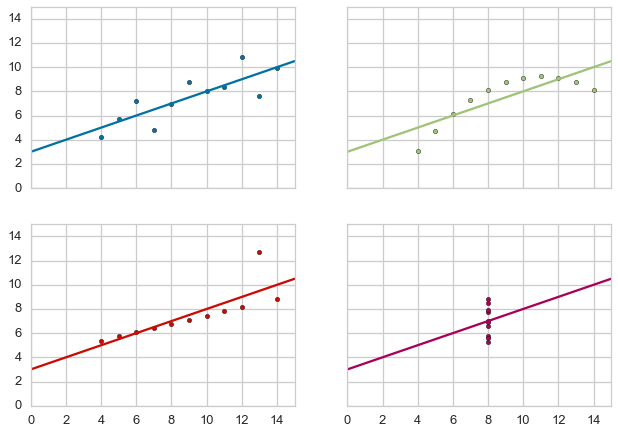

In [3]:
g = yb.anscombe()

## Load Datasets for Example Code

In [4]:
## The path to the test data sets
FIXTURES  = os.path.join(os.getcwd(), "data")

## Dataset loading mechanisms
datasets = {
    "credit": os.path.join(FIXTURES, "credit.xls"),
    "concrete": os.path.join(FIXTURES, "concrete.xls"),
    "occupancy": os.path.join(FIXTURES, 'occupancy', 'datatraining.txt'),
}

## Human readable column names
columns  = {
    "credit": [
        'id', 'limit', 'sex', 'edu', 'married', 'age', 'apr_delay', 'may_delay',
        'jun_delay', 'jul_delay', 'aug_delay', 'sep_delay', 'apr_bill', 'may_bill',
        'jun_bill', 'jul_bill', 'aug_bill', 'sep_bill', 'apr_pay', 'may_pay', 'jun_pay',
        'jul_pay', 'aug_pay', 'sep_pay', 'default'
    ],
    "concrete": [
        'cement', 'slag', 'ash', 'water', 'splast',
        'coarse', 'fine', 'age', 'strength'
    ],
    "occupancy": [
        'date', 'temp', 'humid', 'light', 'co2', 'hratio', 'occupied'
    ],
}


def load_data(name):
    """
    Loads and wrangles the passed in dataset.
    """

    path = datasets[name]
    data = {
        'credit': lambda p: pd.read_excel(p, header=1),
        'concrete': lambda p: pd.read_excel(p),
        'occupancy': lambda p: pd.read_csv(p),
    }[name](path)

    data.columns = columns[name]
    return data

## Regressor Pipeline 

This example demonstrates a regression analysis with visual diagnostics for evaluation and feature analysis. 

In [5]:
# Regression Imports 

from sklearn.linear_model import Ridge 
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

from yellowbrick.features import Rank2D
from yellowbrick.pipeline import VisualPipeline 
from yellowbrick.features import ParallelCoordinates 
from yellowbrick.regressor import PredictionError, ResidualsPlot

In [6]:
# Load the data
df = load_data('concrete')
feature_names = ['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age']
target_name = 'strength'

# Get the X and y data from the DataFrame 
X = df[feature_names].as_matrix()
y = df[target_name].as_matrix() 

# Create the train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
# Build the visual pipeline with a PredictionError Visualizer 

ridge = Ridge()
model = VisualPipeline([
        ('standardize', StandardScaler()), 
        ('rank2d', Rank2D()),
        ('ridge_residuals', ResidualsPlot(ridge)), 
#         ('ridge_pe', PredictionError(ridge)),
    ])

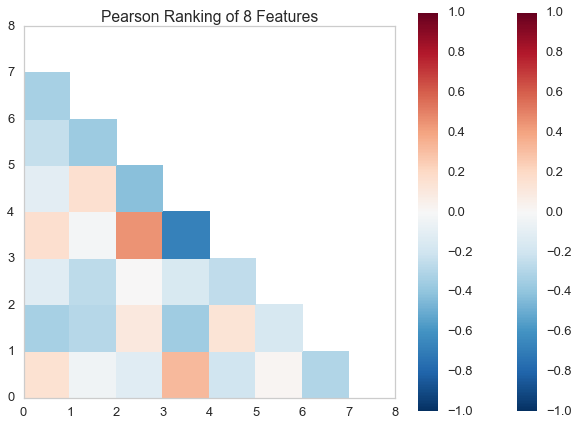

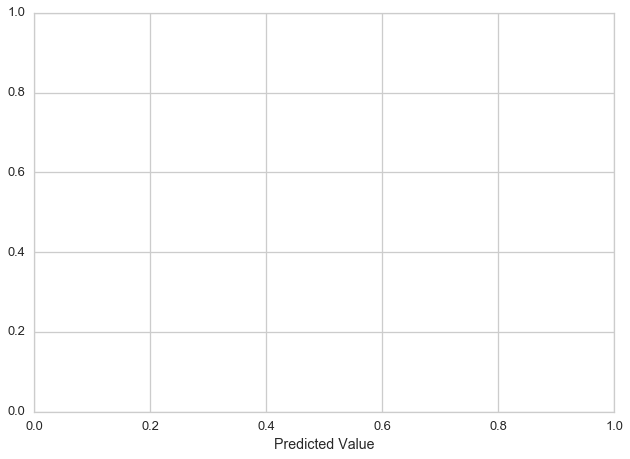

In [17]:
model.fit(X_train, y_train)
model.score(X_test, y_test)
model.poof()